In [11]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point, Polygon, box
import matplotlib.colors as mcolors
from openpyxl import load_workbook

In [12]:
# Load London's geographic boundary (GeoJSON or shapefile)
london_boundary = gpd.read_file("london_421.geojson")  # Replace with full London boundary
boundary_polygon = london_boundary.geometry.union_all()
city_of_london = london_boundary[london_boundary['name'] == 'City of London'].geometry.union_all()

groups = {
    "White British": 0,
    "White Irish": 1,
    "White Gypsy/Irish Traveller": 2,
    "White Roma": 3,
    "White Other": 4,
    "Mixed White and Asian": 5,
    "Mixed White and Black African": 6,
    "Mixed White and Black Caribbean": 7,
    "Mixed Other": 8,
    "Asian Bangladeshi": 9,
    "Asian Chinese": 10,
    "Asian Indian": 11,
    "Asian Pakistani": 12,
    "Asian Other": 13,
    "Black African": 14,
    "Black Caribbean": 15,
    "Black Other": 16,
    "Other Arab": 17,
    "Other Any other": 18
}

In [13]:
df = pd.read_excel("Ethnic group.xlsx", sheet_name="2011", engine='openpyxl')
df

,ward code,ward name,local authority code,local authority name,All usual residents,White British,White Irish,White Gypsy/Irish Traveller,Unnamed: 8,White Other,...,Asian Bangladeshi,Asian Chinese,Asian Indian,Asian Pakistani,Asian Other,Black African,Black Caribbean,Black Other,Other Arab,Other Any other
0,E09000001,City of London (aggregated),E09000001,City of London,7375,4243,180,3,NaN,1373,...,232,263,216,16,213,98,46,49,69,85
1,E05014053,Abbey,E09000002,Barking and Dagenham,3325,496,25,4,NaN,494,...,144,104,701,315,161,503,81,40,23,89
2,E05014054,Alibon,E09000002,Barking and Dagenham,8926,5156,79,3,NaN,700,...,273,71,173,104,230,1455,206,94,31,55
3,E05014055,Barking Riverside,E09000002,Barking and Dagenham,5793,1961,26,10,NaN,432,...,298,45,157,167,183,1684,236,174,30,88
4,E05014056,Beam,E09000002,Barking and Dagenham,7654,3576,137,0,NaN,730,...,187,43,247,93,123,1598,271,191,22,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,E05013805,Regent's Park,E09000033,Westminster,13811,4369,210,10,NaN,3512,...,156,464,1164,223,976,389,99,85,977,556
676,E05013806,St James's,E09000033,Westminster,10247,4621,249,3,NaN,2413,...,156,656,254,81,421,342,94,68,277,177
677,E05013807,Vincent Square,E09000033,Westminster,10569,4846,206,7,NaN,2425,...,272,274,256,77,421,532,119,107,281,264
678,E05013808,West End,E09000033,Westminster,13072,4637,286,3,NaN,3754,...,233,603,569,93,598,365,116,113,703,358


In [14]:
df = df.drop(columns=['ward code', 'ward name', 'local authority code', 'local authority name', 'All usual residents', 'Unnamed: 8'])
df

,White British,White Irish,White Gypsy/Irish Traveller,White Other,Mixed White and Asian,Mixed White and Black African,Mixed White and Black Caribbean,Mixed Other,Asian Bangladeshi,Asian Chinese,Asian Indian,Asian Pakistani,Asian Other,Black African,Black Caribbean,Black Other,Other Arab,Other Any other
0,4243,180,3,1373,111,37,38,103,232,263,216,16,213,98,46,49,69,85
1,496,25,4,494,35,50,26,35,144,104,701,315,161,503,81,40,23,89
2,5156,79,3,700,54,94,86,62,273,71,173,104,230,1455,206,94,31,55
3,1961,26,10,432,35,91,96,82,298,45,157,167,183,1684,236,174,30,88
4,3576,137,0,730,31,98,107,60,187,43,247,93,123,1598,271,191,22,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,4369,210,10,3512,271,84,47,219,156,464,1164,223,976,389,99,85,977,556
676,4621,249,3,2413,155,74,56,151,156,656,254,81,421,342,94,68,277,177
677,4846,206,7,2425,131,125,88,137,272,274,256,77,421,532,119,107,281,264
678,4637,286,3,3754,216,78,84,262,233,603,569,93,598,365,116,113,703,358


In [15]:
tot_pop = df.sum(axis=0)
tot_pop

White British                      3669279
White Irish                         175990
White Gypsy/Irish Traveller           8194
White Other                        1033969
Mixed White and Asian               101512
Mixed White and Black African        65485
Mixed White and Black Caribbean     119424
Mixed Other                         118873
Asian Bangladeshi                   222132
Asian Chinese                       124258
Asian Indian                        542865
Asian Pakistani                     223798
Asian Other                         398511
Black African                       573921
Black Caribbean                     344597
Black Other                         170121
Other Arab                          106032
Other Any other                     175023
dtype: int64

In [16]:
pop = tot_pop.sum()
pop_f = tot_pop/pop
group_ratios = list(pop_f) 

<Figure size 1000x1000 with 0 Axes>

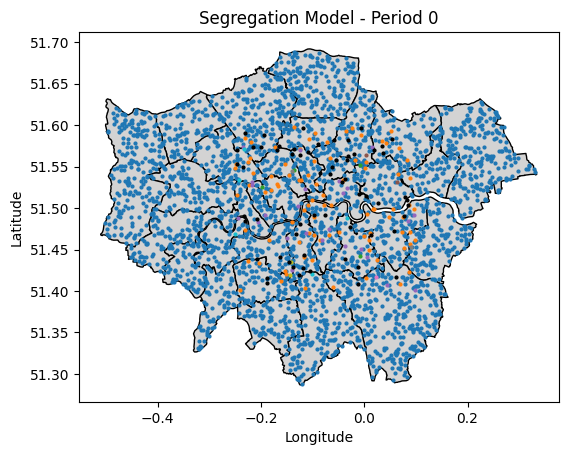

<Figure size 1000x1000 with 0 Axes>

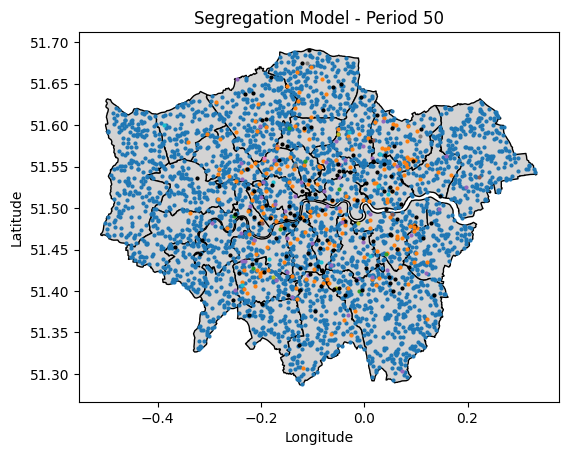

<Figure size 1000x1000 with 0 Axes>

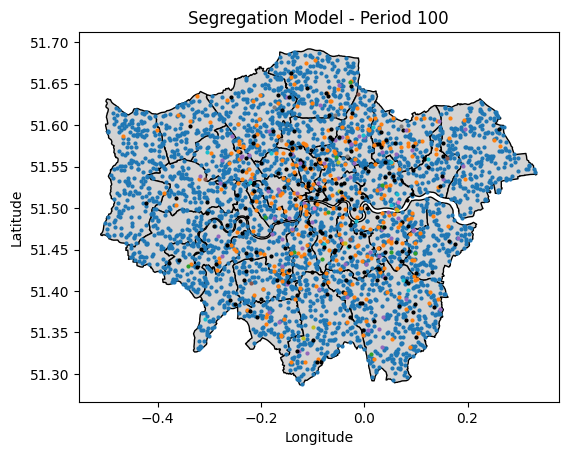

<Figure size 1000x1000 with 0 Axes>

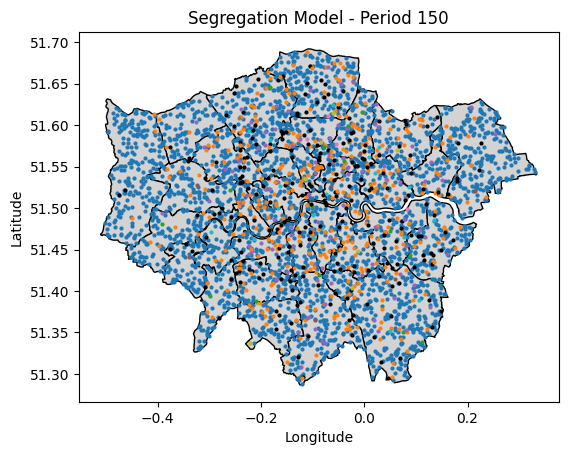

<Figure size 1000x1000 with 0 Axes>

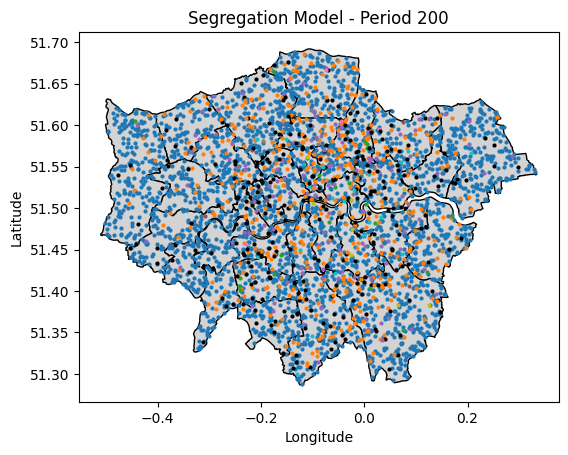

<Figure size 1000x1000 with 0 Axes>

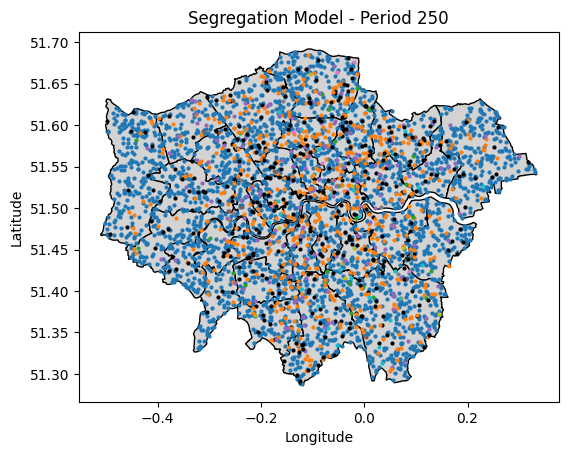

<Figure size 1000x1000 with 0 Axes>

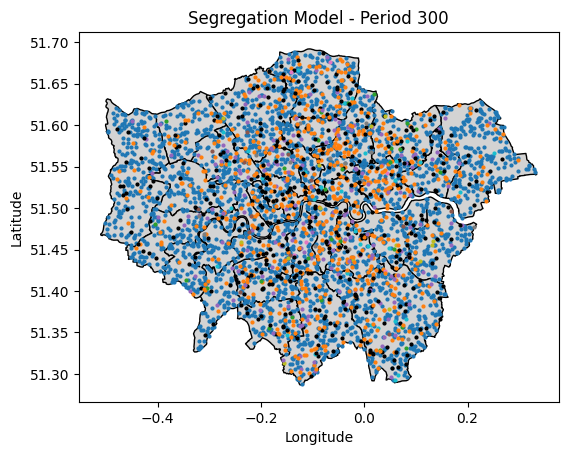

<Figure size 1000x1000 with 0 Axes>

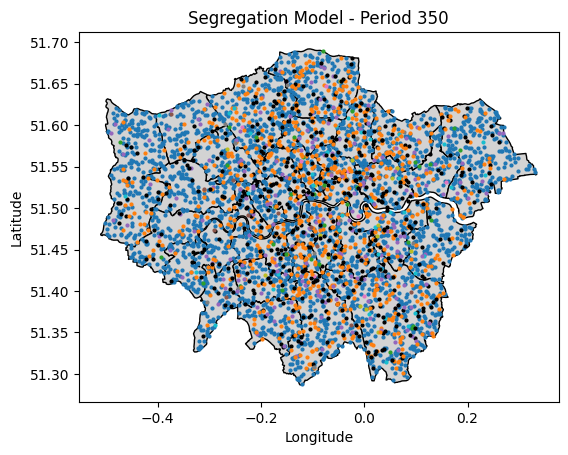

<Figure size 1000x1000 with 0 Axes>

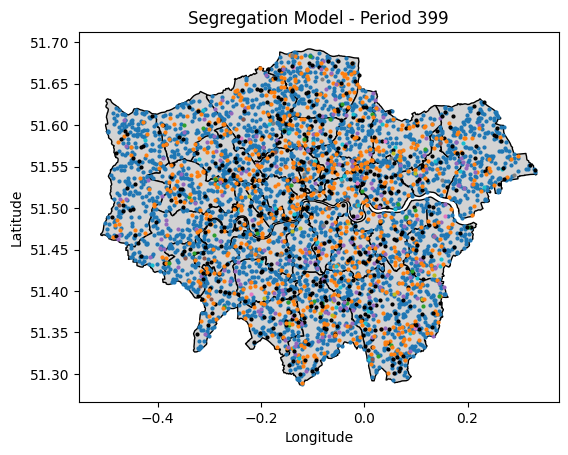

In [17]:
from rtree import index

# Define the bounding box for metropolitan London (approximate)
london_metropolitan = box(-0.25, 51.40, 0.1, 51.60)  # WGS 84 coordinates

num_agents = 5000
general_satisfaction_threshold = 0.4
city_of_london_satisfaction_threshold = 0.3
num_periods = 400
initial_agents = 3000  # Start with only native whites (agent_type 0)
new_agents_per_period = 200  # Number of new agents to add each period

def initialize_native_population(count):
    agents = []
    for _ in range(count):
        while True:
            x, y = random.uniform(boundary_polygon.bounds[0], boundary_polygon.bounds[2]), \
                   random.uniform(boundary_polygon.bounds[1], boundary_polygon.bounds[3])
            point = Point(x, y)
            if boundary_polygon.contains(point):  # Ensure within the boundary of London
                agents.append((0, point))  # Native population is agent 0
                break
    return agents

def initialize_new_migrants(count, groups, metropolitan_polygon):
    agents = []
    for group, ratio in zip(groups.values(), group_ratios):
        group_count = int(ratio * count)
        for _ in range(group_count):
            while True:
                x, y = random.uniform(metropolitan_polygon.bounds[0], metropolitan_polygon.bounds[2]), \
                       random.uniform(metropolitan_polygon.bounds[1], metropolitan_polygon.bounds[3])
                point = Point(x, y)
                if metropolitan_polygon.contains(point):  # Ensure within the metropolitan area
                    agents.append((group, point))
                    break
    return agents

# Function to initialize R-tree index
def build_rtree_index(agents):
    rtree_index = index.Index()
    for idx, agent in enumerate(agents):
        rtree_index.insert(idx, agent[1].bounds)  # Insert agent’s bounding box into R-tree
    return rtree_index

# Modified is_satisfied function using R-tree
def is_satisfied(agent, agents, rtree_idx, radius=0.05):
    agent_type, agent_location = agent
    nearby_agents_idx = list(rtree_idx.intersection(agent_location.buffer(radius).bounds))
    # Filter valid indices to avoid IndexError
    valid_neighbors = [agents[idx] for idx in nearby_agents_idx if idx < len(agents)]
    similar_neighbors = sum(1 for neighbor in valid_neighbors if neighbor[0] == agent_type)

    # Apply different threshold if agent is in 'City of London'
    threshold = city_of_london_satisfaction_threshold if city_of_london.contains(agent_location) else general_satisfaction_threshold
    return len(valid_neighbors) > 0 and (similar_neighbors / len(valid_neighbors)) >= threshold

# Move unsatisfied agents with R-tree support
def move_unsatisfied_agents(agents, rtree_idx):
    for i, agent in enumerate(agents):
        if not is_satisfied(agent, agents, rtree_idx):
            j = 0
            while j<50:
                j+=1
                move_x, move_y = random.uniform(-0.02, 0.02), random.uniform(-0.02, 0.02)
                new_location = Point(agent[1].x + move_x, agent[1].y + move_y)
                if boundary_polygon.contains(new_location):  # Ensure new location is within London
                    agents[i] = (agent[0], new_location)
                    rtree_idx.delete(i, agent[1].bounds)  # Remove old location
                    rtree_idx.insert(i, new_location.bounds)  # Insert new location
                    break

# Color map for visualization
colors = list(mcolors.TABLEAU_COLORS.keys())[:19]
color_map = {i: mcolors.TABLEAU_COLORS[color] for i, color in enumerate(colors)}

# Visualization function to plot agents
def plot_agents(agents, period):
    plt.figure(figsize=(10, 10))
    london_boundary.plot(color="lightgrey", edgecolor="black")
    for group, location in agents:
        plt.plot(location.x, location.y, 'o', color=color_map.get(group, 'black'), markersize=2)
    plt.title(f'Segregation Model - Period {period}')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


agents = initialize_native_population(initial_agents)
del groups['White British']
rtree_idx = build_rtree_index(agents)
# Run simulation with updated R-tree for each period
for period in range(num_periods):
    move_unsatisfied_agents(agents, rtree_idx)

    # Add new agents each period within the metropolitan area
    if period%50 == 0:
        new_migrants = initialize_new_migrants(new_agents_per_period, groups, london_metropolitan)
        agents.extend(new_migrants)
        agents = agents[:num_agents]
        rtree_idx = build_rtree_index(agents) 
        
    if period % 50 == 0 or period == num_periods - 1:
        plot_agents(agents, period)

<Figure size 1000x1000 with 0 Axes>

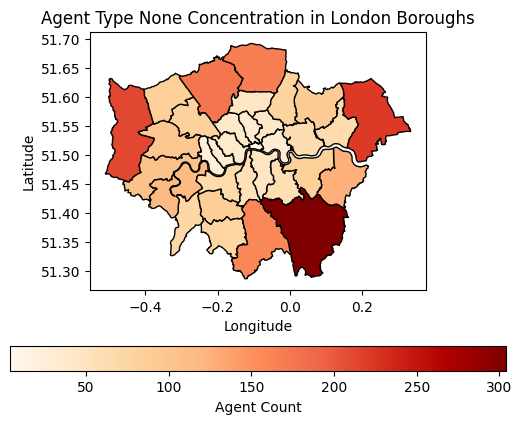

<Figure size 1000x1000 with 0 Axes>

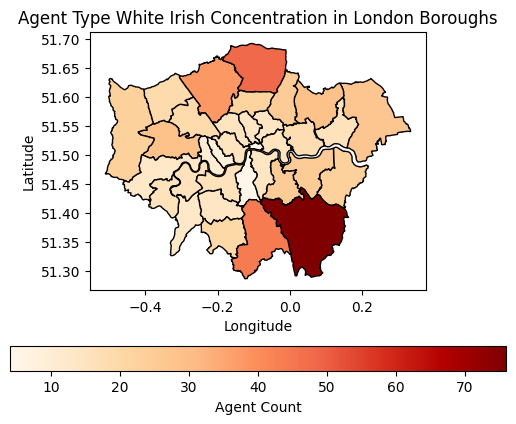

<Figure size 1000x1000 with 0 Axes>

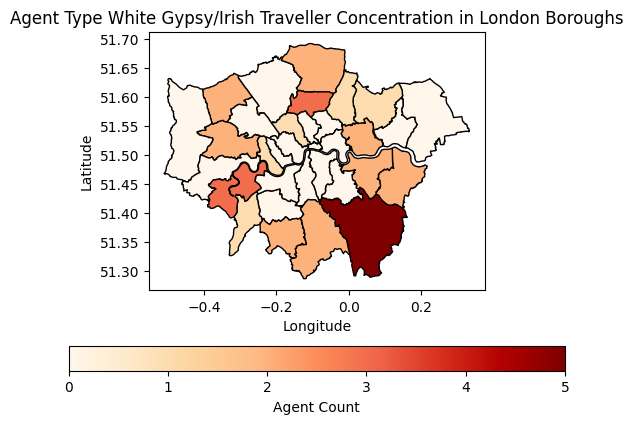

<Figure size 1000x1000 with 0 Axes>

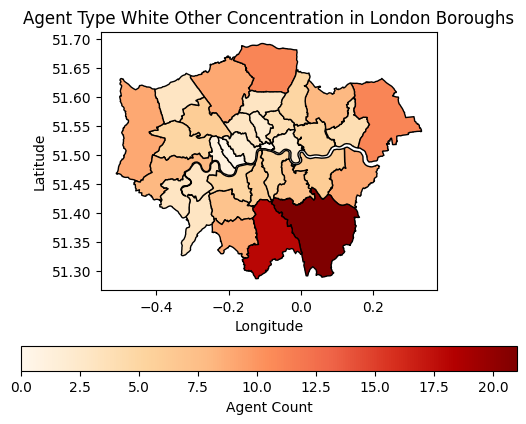

<Figure size 1000x1000 with 0 Axes>

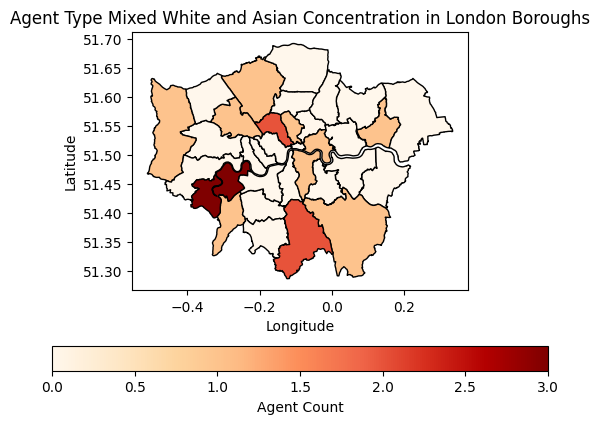

<Figure size 1000x1000 with 0 Axes>

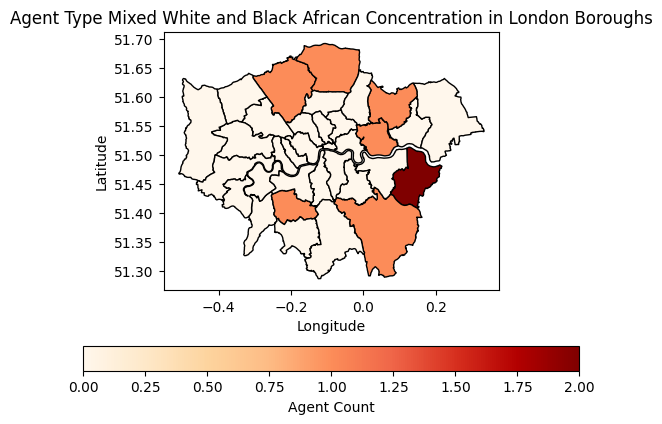

<Figure size 1000x1000 with 0 Axes>

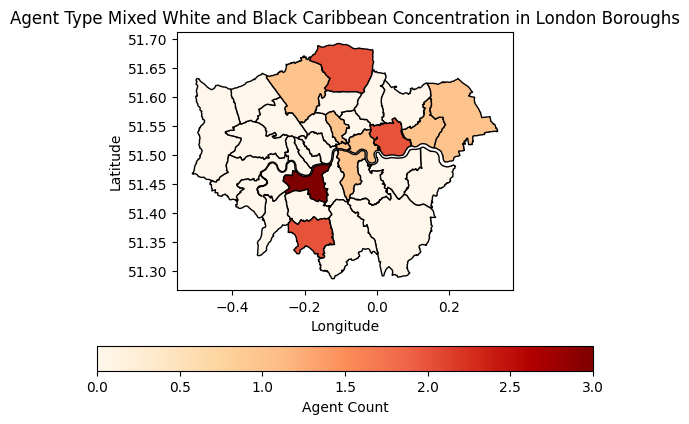

<Figure size 1000x1000 with 0 Axes>

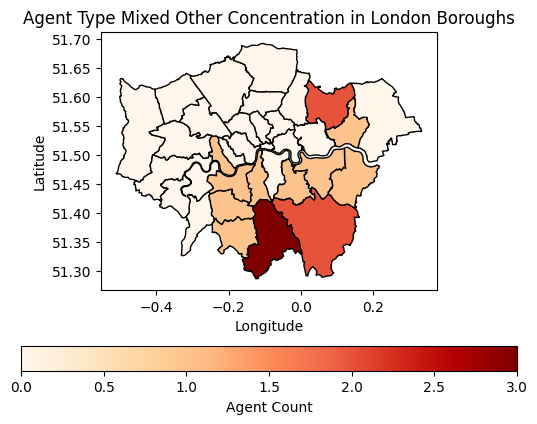

<Figure size 1000x1000 with 0 Axes>

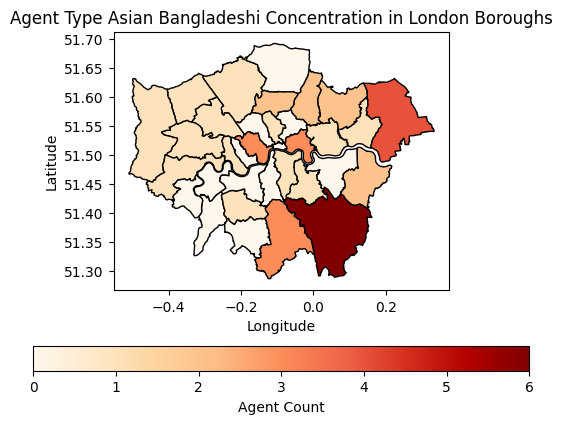

<Figure size 1000x1000 with 0 Axes>

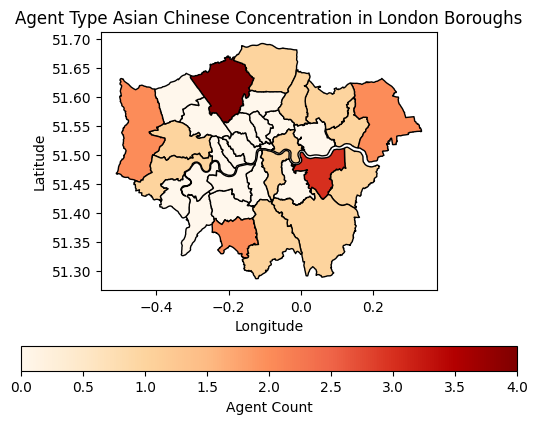

<Figure size 1000x1000 with 0 Axes>

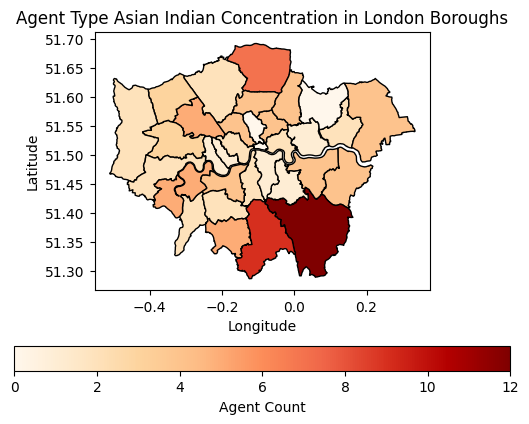

<Figure size 1000x1000 with 0 Axes>

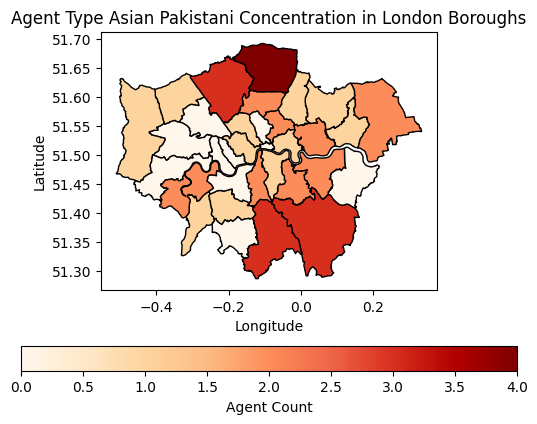

<Figure size 1000x1000 with 0 Axes>

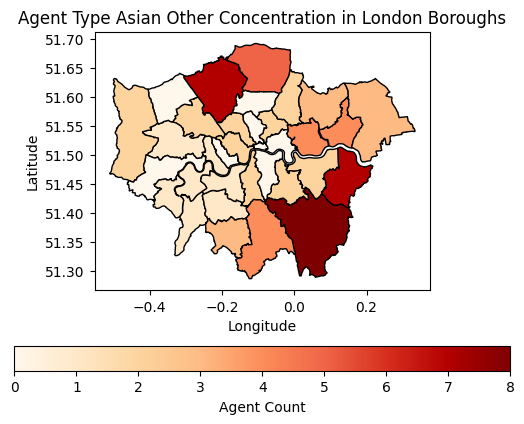

<Figure size 1000x1000 with 0 Axes>

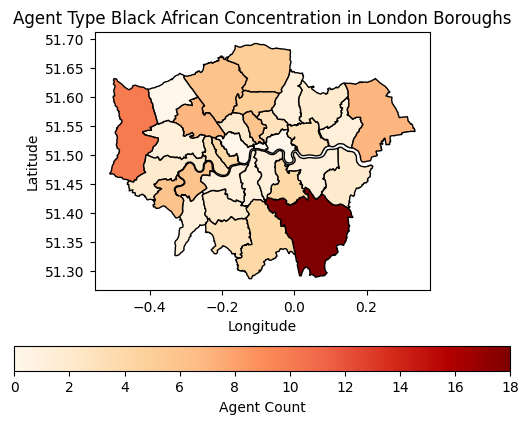

<Figure size 1000x1000 with 0 Axes>

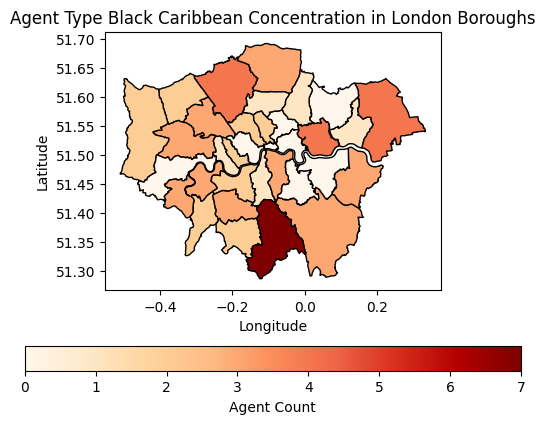

<Figure size 1000x1000 with 0 Axes>

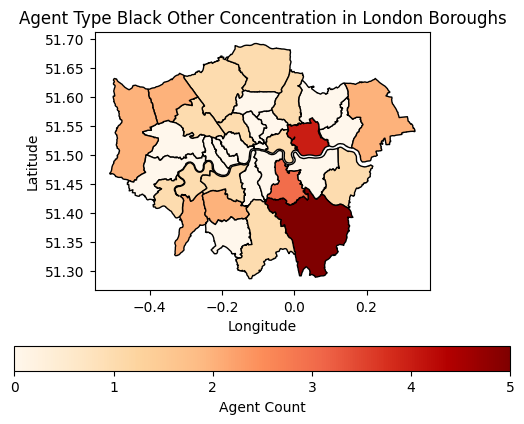

<Figure size 1000x1000 with 0 Axes>

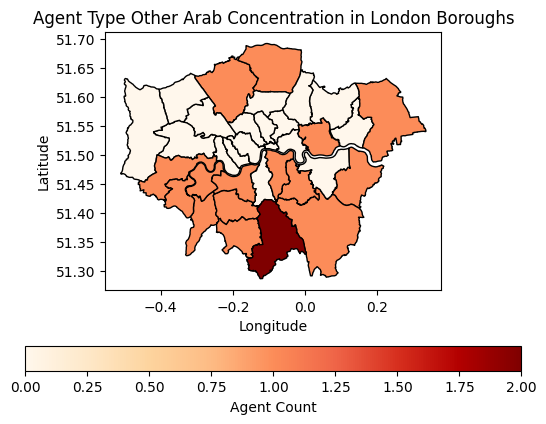

<Figure size 1000x1000 with 0 Axes>

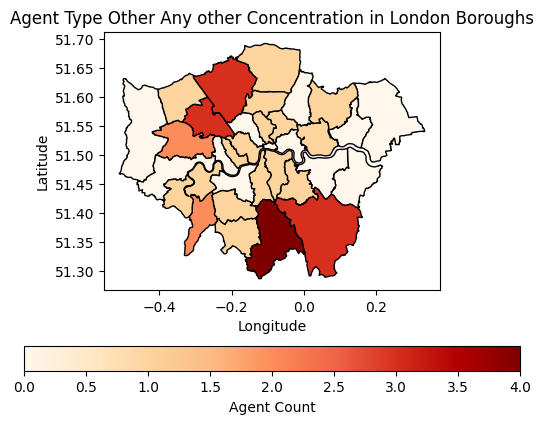

In [19]:
# Step 1: Separate agent types and their points
agent_types, points = zip(*agents)

# Step 2: Create a GeoDataFrame for agents and ensure CRS matches London boundary
agents_gdf = gpd.GeoDataFrame({'agent_type': agent_types, 'geometry': points}, crs="EPSG:4326").to_crs(london_boundary.crs)

# Step 3: Perform spatial join to count agents within each borough
london_with_agents = london_boundary.sjoin(agents_gdf, how='left', predicate='contains')
agent_counts = london_with_agents.groupby(['name', 'agent_type']).size().unstack(fill_value=0)

# Step 4: Add agent counts (concentration) directly to london_boundary for each type
for agent_type in agent_counts.columns:
    london_boundary[f'agent_density_type_{agent_type}'] = london_boundary['name'].map(agent_counts[agent_type]).fillna(0)

# Step 5: Plot each agent type concentration directly
for agent_type in agent_counts.columns:
    plt.figure(figsize=(10, 10))
    column_name = f'agent_density_type_{agent_type}'
    
    london_boundary.plot(column=column_name, cmap='OrRd', legend=True, edgecolor="black",
                         legend_kwds={'label': "Agent Count", 'orientation': "horizontal"})
    
    # Adding titles and labels
    plt.title(f"Agent Type {next((k for k, v in groups.items() if v == agent_type), None)} Concentration in London Boroughs")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()